# Clasificador de imágenes CIFAR10

In [0]:
% load_ext autoreload
% autoreload 2

In [2]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
# The data, split between train, val and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_flip=np.flip(x_train,axis=2)
x_train_flip=x_train_flip.reshape(-1,3072)
x_train=x_train.reshape(-1,3072)
x_test=x_test.reshape(-1,3072)
x_train=np.vstack([x_train,x_train_flip])
y_train=np.vstack([y_train, y_train])
scaler=StandardScaler()
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, stratify=y_train)
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_val_std=scaler.transform(x_val)
x_test_std=scaler.transform(x_test)

clases=["airplane",
        "automobile",							
        "bird",										
        "cat",										
        "deer",										
        "dog",										
        "frog",										
        "horse",										
        "ship",										
        "truck"]

In [38]:
# Chequeamos que los subsets queden correctamente estratificados.
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000]))

In [39]:
x_train_std[:,10].std()

0.9999999999999968

In [0]:
# Función para graficar las imágenes
def plot_img(imageID,x,y):
  plt.figure(figsize=[2,2])
  plt.imshow(x[imageID].reshape(32,32,3))
  plt.show()
  print(f'Clase: {clases[y[imageID][0]]}')

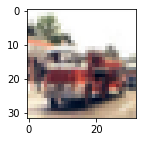

Clase: truck


In [43]:
plot_img(73890,x_train,y_train)

In [51]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer=ModelCheckpoint("best_weights.hdf5",monitor="val_acc",save_best_only=True,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=10,verbose=True)
model=Sequential()
model.add(Dense(200,activation="linear",input_shape=(3072,)))
model.add(Dropout(rate=0.2))
model.add(Activation("relu"))

model.add(Dense(200,activation="linear"))
model.add(Dropout(rate=0.2))
model.add(Activation("relu"))

model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_23 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2010      
Total params: 656,810
Trainable params: 656,810
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x=x_train_std,y=y_train,validation_data=(x_val_std,y_val),batch_size=256,epochs=200,callbacks=[checkpointer])

Train on 80000 samples, validate on 20000 samples
Epoch 1/200
80000/80000 [==============================] - 4s 54us/step - loss: 2.1449 - acc: 0.4244 - val_loss: 1.9263 - val_acc: 0.4668

Epoch 00001: val_acc improved from -inf to 0.46680, saving model to best_weights.hdf5
Epoch 2/200
80000/80000 [==============================] - 3s 43us/step - loss: 1.7825 - acc: 0.4977 - val_loss: 1.7451 - val_acc: 0.4956

Epoch 00002: val_acc improved from 0.46680 to 0.49565, saving model to best_weights.hdf5
Epoch 3/200
80000/80000 [==============================] - 3s 44us/step - loss: 1.6198 - acc: 0.5274 - val_loss: 1.6406 - val_acc: 0.5132

Epoch 00003: val_acc improved from 0.49565 to 0.51320, saving model to best_weights.hdf5
Epoch 4/200
80000/80000 [==============================] - 3s 42us/step - loss: 1.5344 - acc: 0.5443 - val_loss: 1.5956 - val_acc: 0.5166

Epoch 00004: val_acc improved from 0.51320 to 0.51660, saving model to best_weights.hdf5
Epoch 5/200
80000/80000 [================

KeyboardInterrupt: ignored

In [0]:
model.load_weights("best_weights.hdf5")

In [36]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 150us/step


[0.735667244720459, 0.7606]

In [126]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Ejemplo Red Con Regularización L2

In [0]:
from keras.layers import Dense, Dropout,Activation,Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer=ModelCheckpoint("best_weights.hdf5",monitor="val_acc",save_best_only=True,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=10,verbose=True)
reg=l2(l=0.001)
model=Sequential()

model.add(Dense(200,activation="relu",kernel_regularizer=reg,bias_regularizer=reg, input_shape=(3072,)))
model.add(Dense(200,activation="relu",kernel_regularizer=reg,bias_regularizer=reg))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

# Ejemplo Red Conv 2D

In [0]:
from keras.layers import Dense, Dropout,Activation,Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer=ModelCheckpoint("best_weights.hdf5",monitor="val_acc",save_best_only=True,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=10,verbose=True)
reg=l2(l=0.01)
model=Sequential()
model.add(Conv2D(64,3,input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())